# Instalación en el Subsistema Linux de Windows

Seguiremos los pasos del notebook "install" para la instalación del entorno de trabajo en Linux, concretamente la primera opción (no he conseguido que funcione la segunda, pero si alguien lo consigue soy todo oídos). Cualquier comentario a vladyslav.grechyshkin@um.es, pero si me contactáis de otra manera me da igual.

Para ello, primero tenemos que instalar el subsistema de Linux en Windows (WSL).

## Instalación del subsistema de Linux en Windows

Antes de nada, tenemos que activar en las características de Windows dicho subsistema. Escribimos "características" en el buscador de Windows y debería aparecer. También se puede acceder desde el panel de control. Una vez abierto, buscamos "Subsistema de Windows para Linux" y lo activamos.

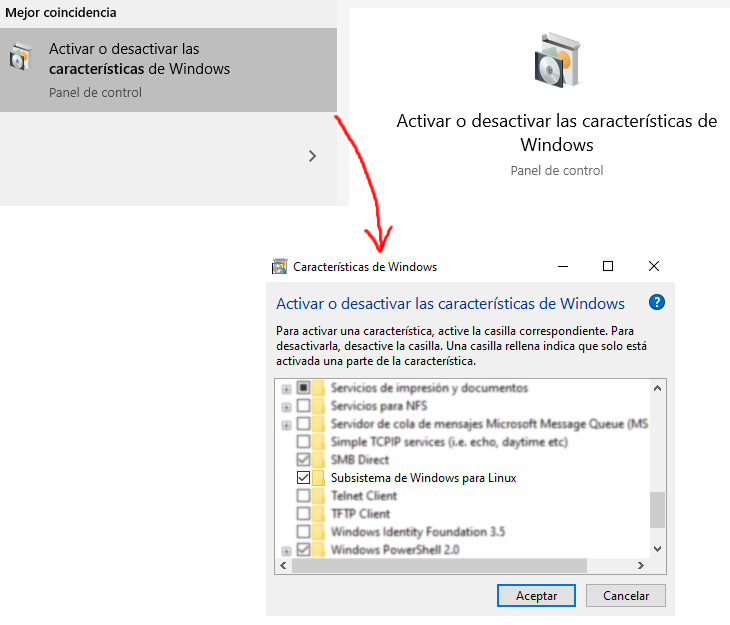

Después de activar la característica, buscamos el subsistema en Windows Store escribiendo "Ubuntu". Elegimos la opción que se llama "Ubuntu".

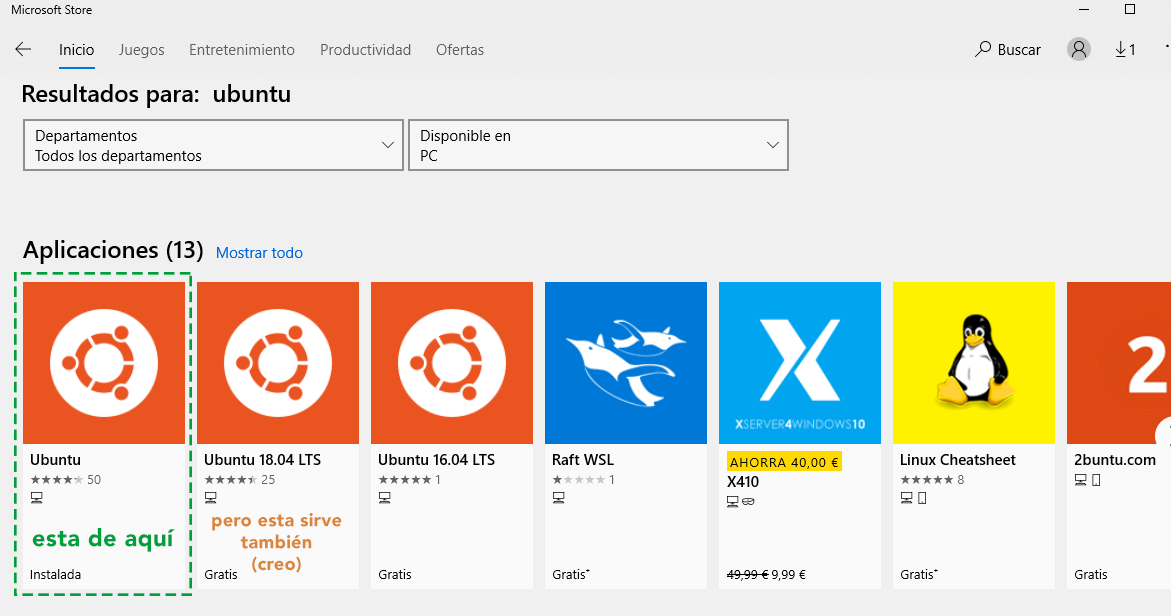

En principio la segunda opción, "Ubuntu 18.04 LTS", debería funcionar también puesto que la versión, de momento, es la misma que la de la primera opción.

Una vez instalado, hay que inicializar la distribución: https://docs.microsoft.com/es-es/windows/wsl/initialize-distro

Básicamente es abrir WSL, crear un nuevo usuario y hacer apt-get update. Si queréis cambiar vuestro usuario default a root (totalmente opcional), seguir los pasos de aquí: https://askubuntu.com/a/966537

Ahora, pasamos a instalar el entorno de trabajo.

## Instalación del entorno de trabajo

Pues nada, CTRL-C + CTRL-V de los pasos de Alberto. En negrita dejo anotaciones y pasos a seguir en caso de que no funcionen los pasos originales:

### Instalación de miniconda

Descargamos [miniconda](https://conda.io/miniconda.html) para nuestro sistema con python 3 y lo instalamos.

    bash Miniconda3-latest-Linux-x86_64.sh

Nos preguntará si queremos inicializar la instalación (sí) y la forma de configurarlo para que los terminales no arranquen automáticamente dentro del entorno base.

Una vez instalado hay que cerrar el terminal y abrir otro. Comprobamos que está bien instalado:

    conda activate base
    
__[V]: si no reconoce el comando "conda", es porque el path no está configurado. Añadimos `export PATH=~/miniconda3/bin:\$PATH` a .bashrc. Si sois root hay que añadirlo a .bash_profile (no tengo ni idea de por qué) Asimismo, si no encuentra python (no debería pasar), ejecutamos `sudo apt install python3 python3-pip ipython3`__

    (base) usuario @ maquina> python

    Python 3.7

### Instalación del environment

    wget https://robot.inf.um.es/material/va/via-local.zip
    
    unzip via-local.zip
    
    cd via-local

    conda create --name via --file visionreqlocal.txt

__[V]: En el portátil me ha ocurrido que no ha sido capaz de instalar el paquete de OpenGL por algún motivo. No pasa nada, ejecutamos `sudo apt-get install libglu1-mesa-dev freeglut3-dev mesa-common-dev` y volvemos a ejecutar el comando. Si dice que ya está creado el entorno, lo borramos.__
    
    conda activate via

__[V]: Si no funciona, ejecutamos `source ~/miniconda3/etc/profile.d/conda.sh`. Hay que hacerlo cada vez que queremos activar el entorno. Para ahorrarnos el esfuerzo continuo, añadimos dicho comando a .bashrc (o .bash_profile si sois root).__

    bash install-pip.sh

Si todo ha ido bien puedes borrar el archivo `via-local.zip` y el directorio `via-local` descomprimido.

Debe funcionar todo sin mayores problemas, pero tiene versiones de los paquetes que no son recientes y es más difícil actualizarla.

__[V]: Si falla cualquier paquete, mi regla de oro es instalar el paquete en conda directamente (haciendo `conda install`) y rezar para que funcione.__

### "Workaround" para la interfaz gráfica

Woo, nos funciona todo, ya hemos acabado, ¿no? Pues no. El problema del subsistema de Linux (entre otros) es que __no__ tiene interfaz gráfica, de modo que tendremos que hacer una pequeña jugarreta para poder mostrar cualquier elemento visual por pantalla. Seguimos las instrucciones de aquí: https://stackoverflow.com/a/43399827

1) Instalamos XcXsrv (https://sourceforge.net/projects/vcxsrv/).

2) Ejecutamos `conda install -c anaconda tk`.

3) Añadimos `export DISPLAY=localhost:0.0` al final del .bashrc

Para inicializar el servicio, buscamos "xlaunch" en el navegador de Windows y lo ejecutamos. Le damos a "Siguiente" hasta que nos deje en paz el programa, dejando todas las configuraciones predeterminadas:

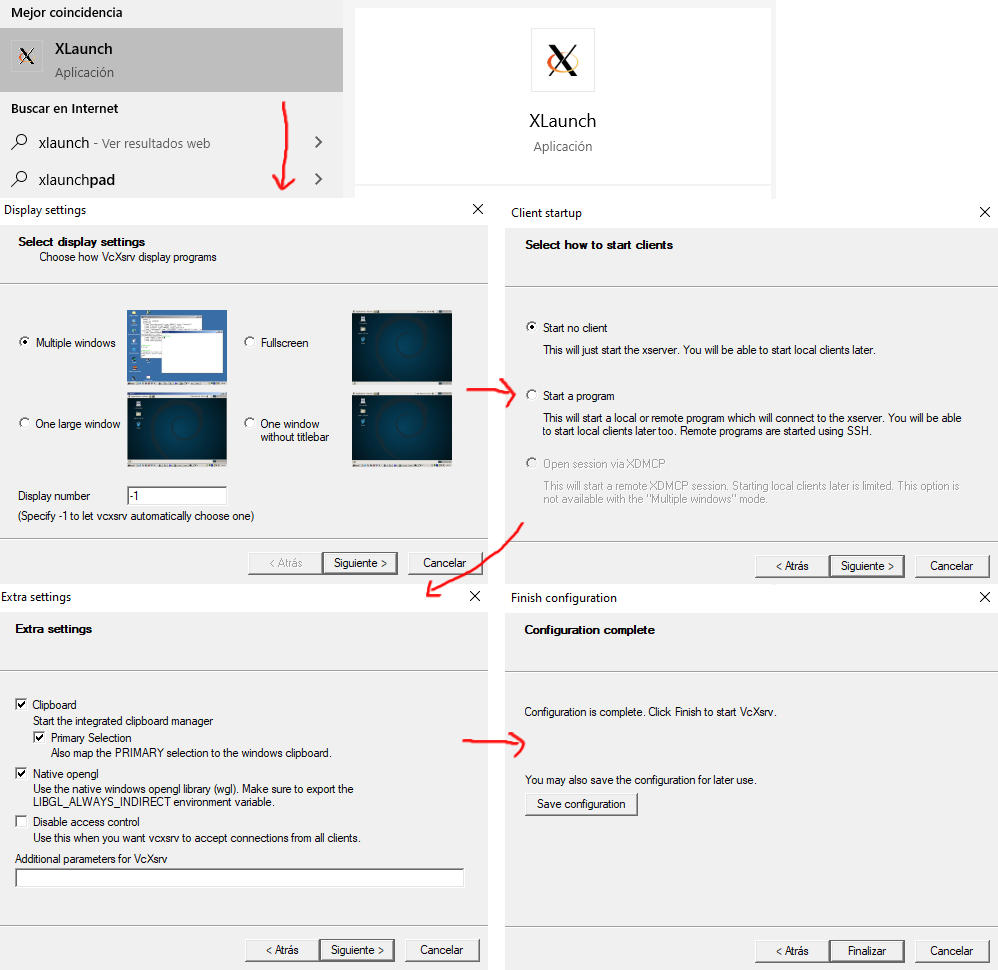


Ahora sí, ya hemos acabado. Hacemos una comprobación básica.

```python
    #!/usr/bin/env python

    import numpy             as np
    import cv2               as cv
    import matplotlib.pyplot as plt

    from skimage import io

    img = cv.imread('./images/coins.png') # u otra imagen
    print(type(img))
    print(img.shape)

    plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB));
    plt.show();
```

Ejecutamos el script anterior (basado en los fragmentos de código del notebook "install") y debería aparecer algo similar a esto:

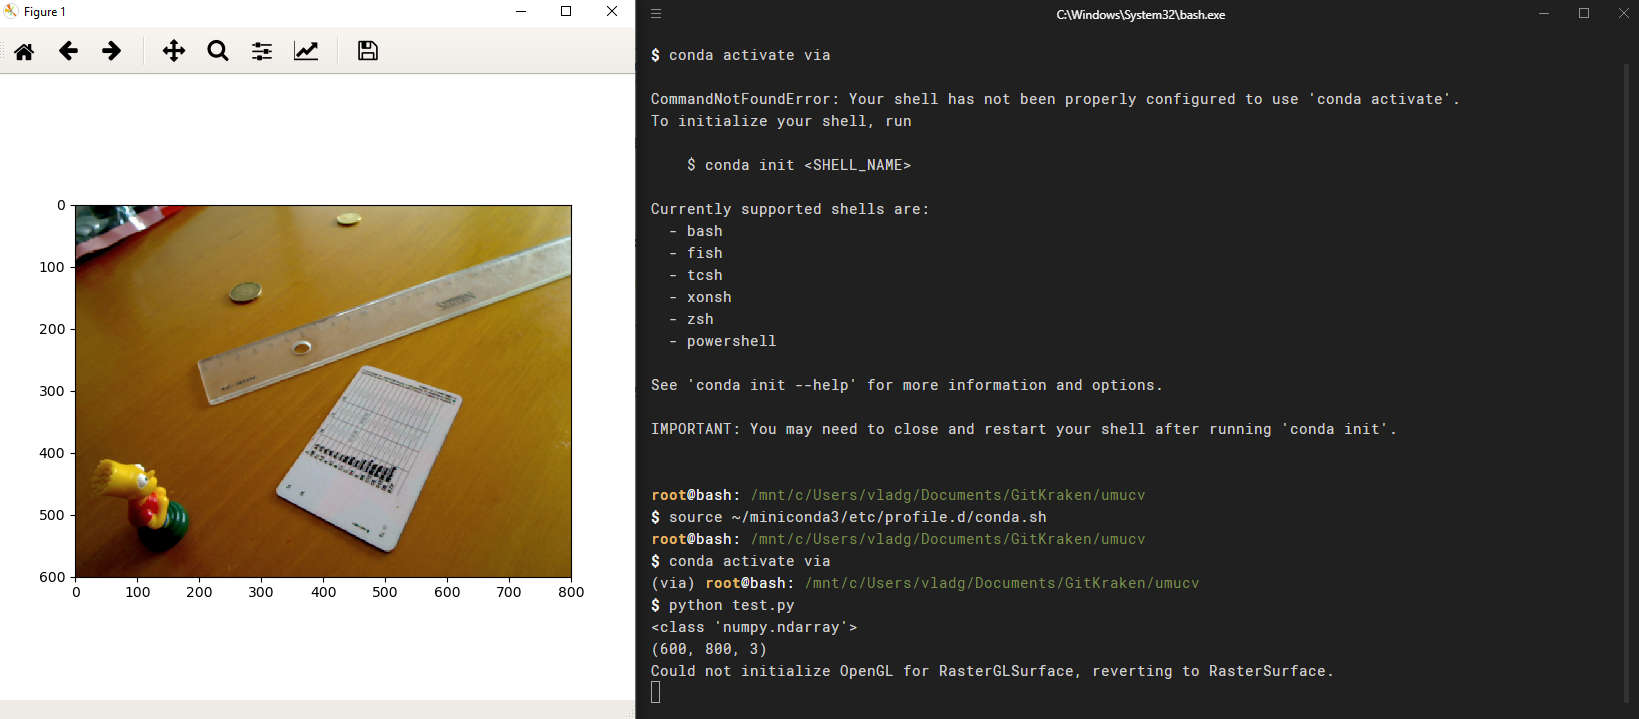


# Limitaciones y otros comentarios

El subsistema, seguramente, no podrá acceder a vuestra cámara a no ser que lo configuréis. Yo no lo he intentado pero aquí tenéis un enlace por si os atrevéis: https://funvision.blogspot.com/2019/12/opencv-web-camera-and-video-streams-in.html

Si queréis usar alguna especie de fuente de vídeo en directo, un servidor RTSP desde el móvil funciona sin ningún problema (he usado esta aplicación https://play.google.com/store/apps/details?id=veg.mediacapture.sdk.test.server&hl=es. En iOS funciona también con alguna otra aplicación) con las funciones de autoStream (echadle un vistazo al script stream.py)

Aquí un ejemplo:

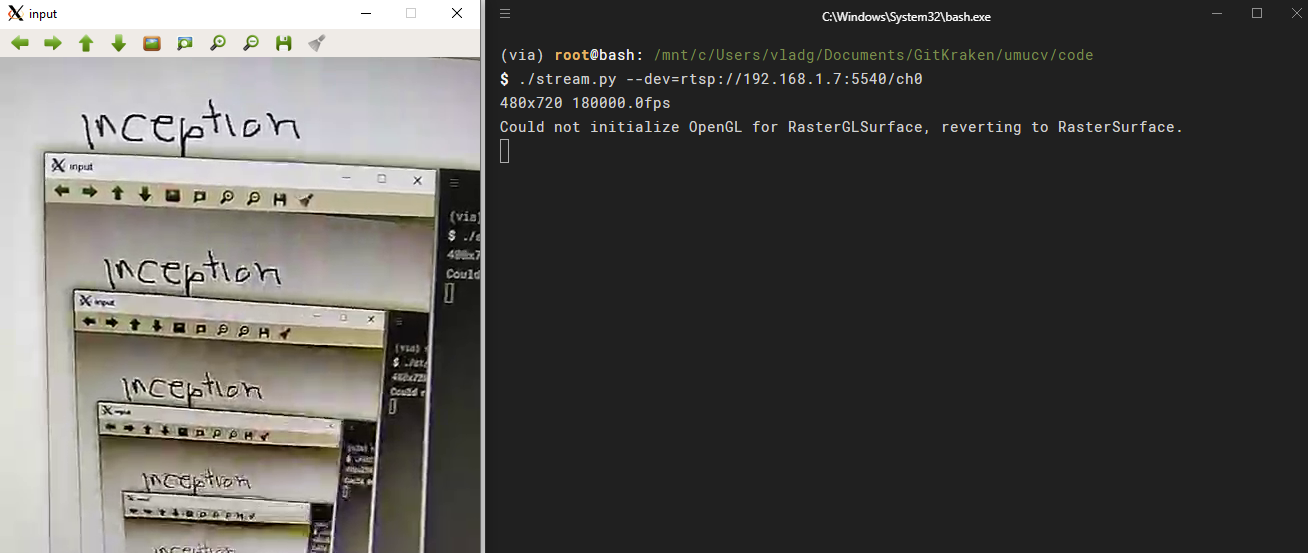

Ya por último, si os gusta cómo ha quedado mi terminal, ha sido utilizando un programa llamado Hyper.